In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 25, 10

df = pd.read_csv("compas-scores-two-years.csv")

In this dataset, we have a decile score(0-10) which is predicted by the system showing how they think if a subject is 
likely to redo crime. And we also have the two_year_recid value(0,1) which is the truth of there behavior.

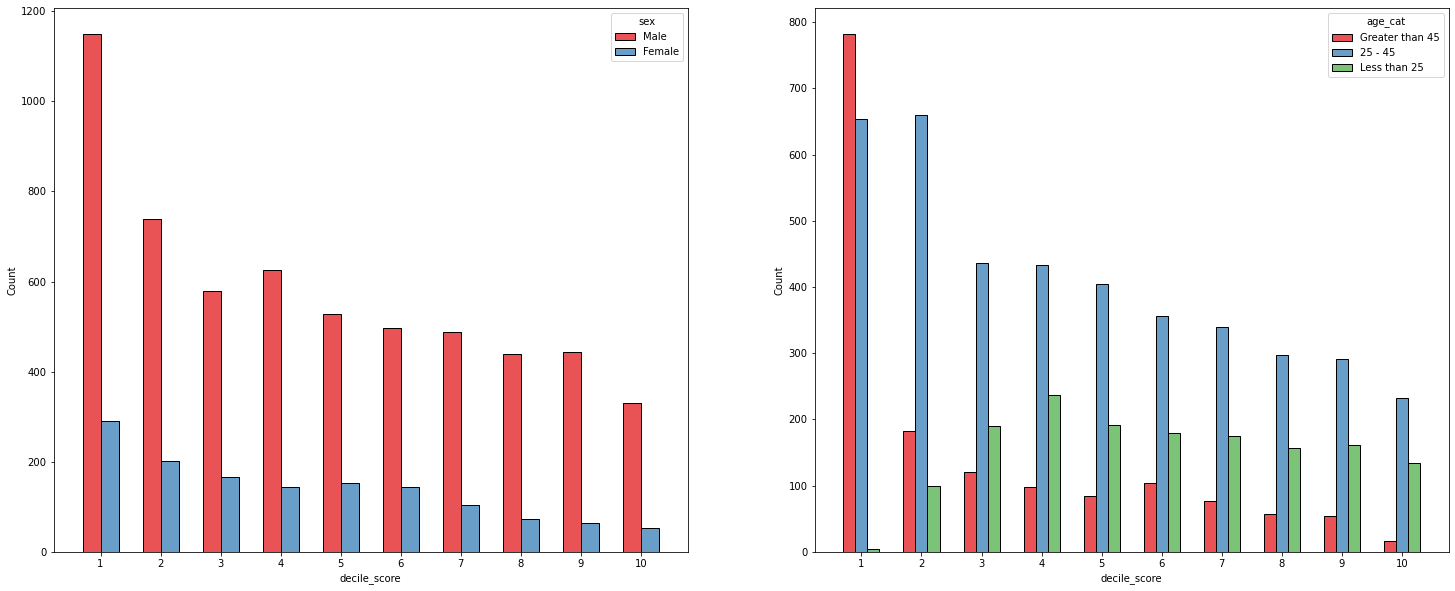

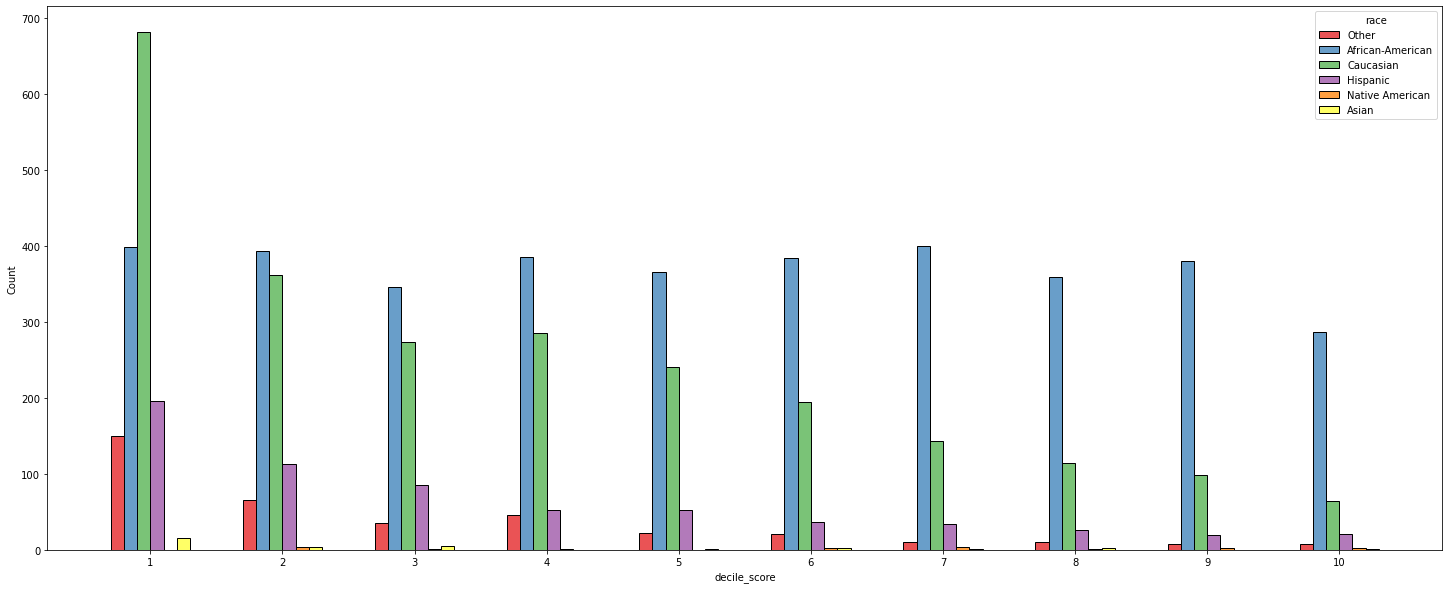

In [2]:
plt.subplot(121)
sns.histplot(data=df, palette=sns.color_palette("Set1", 2), shrink=.6, x='decile_score', hue='sex', multiple='dodge', discrete=True)
plt.xticks(list(range(1, 11)), list(range(1, 11)))

plt.subplot(122)
sns.histplot(data=df, palette=sns.color_palette("Set1", 3), shrink=.6, x='decile_score', hue='age_cat', multiple='dodge', discrete=True)
plt.xticks(list(range(1, 11)), list(range(1, 11)))

plt.show()

sns.histplot(data=df, palette=sns.color_palette("Set1", 6), shrink=.6, x='decile_score', hue='race', multiple='dodge', discrete=True)
plt.xticks(list(range(1, 11)), list(range(1, 11)))

plt.show()

In [3]:
df['decile_score'].value_counts()

1     1440
2      941
4      769
3      747
5      681
6      641
7      592
8      512
9      508
10     383
Name: decile_score, dtype: int64

In [4]:
df['v_decile_score'].value_counts()

1     1911
2     1073
3      979
4      798
5      689
6      598
7      452
8      300
9      290
10     124
Name: v_decile_score, dtype: int64

In [5]:
list(df.columns)

['id',
 'name',
 'first',
 'last',
 'compas_screening_date',
 'sex',
 'dob',
 'age',
 'age_cat',
 'race',
 'juv_fel_count',
 'decile_score',
 'juv_misd_count',
 'juv_other_count',
 'priors_count',
 'days_b_screening_arrest',
 'c_jail_in',
 'c_jail_out',
 'c_case_number',
 'c_offense_date',
 'c_arrest_date',
 'c_days_from_compas',
 'c_charge_degree',
 'c_charge_desc',
 'is_recid',
 'r_case_number',
 'r_charge_degree',
 'r_days_from_arrest',
 'r_offense_date',
 'r_charge_desc',
 'r_jail_in',
 'r_jail_out',
 'violent_recid',
 'is_violent_recid',
 'vr_case_number',
 'vr_charge_degree',
 'vr_offense_date',
 'vr_charge_desc',
 'type_of_assessment',
 'decile_score.1',
 'score_text',
 'screening_date',
 'v_type_of_assessment',
 'v_decile_score',
 'v_score_text',
 'v_screening_date',
 'in_custody',
 'out_custody',
 'priors_count.1',
 'start',
 'end',
 'event',
 'two_year_recid']

In [6]:
df['age_cat'].value_counts()

25 - 45            4109
Greater than 45    1576
Less than 25       1529
Name: age_cat, dtype: int64

In [7]:
df['race'].value_counts()

African-American    3696
Caucasian           2454
Hispanic             637
Other                377
Asian                 32
Native American       18
Name: race, dtype: int64

In [8]:
(((df['race'].value_counts() / len(df))
  * 100)
 .round(2))

African-American    51.23
Caucasian           34.02
Hispanic             8.83
Other                5.23
Asian                0.44
Native American      0.25
Name: race, dtype: float64

In [9]:
df['score_text'].value_counts()

Low       3897
Medium    1914
High      1403
Name: score_text, dtype: int64

In [10]:
pd.crosstab(df['sex'], df['race'])

race,African-American,Asian,Caucasian,Hispanic,Native American,Other
sex,,,,,,
Female,652,2,567,103,4,67
Male,3044,30,1887,534,14,310


In [11]:
(((df['sex'].value_counts() / len(df))
  * 100)
 .round(2))

Male      80.66
Female    19.34
Name: sex, dtype: float64

In [12]:
(((df['two_year_recid'].value_counts() / len(df))
  * 100)
 .round(2))

0    54.93
1    45.07
Name: two_year_recid, dtype: float64

In [13]:
RACE_IN_FOCUS = ['African-American', 'Caucasian']
df_race_focused = df[df['race'].isin(RACE_IN_FOCUS)]

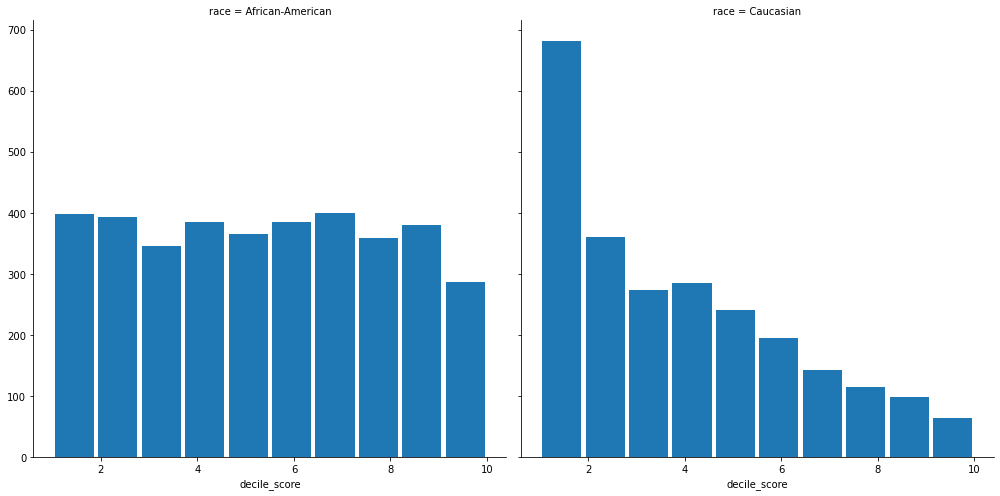

In [14]:
g = sns.FacetGrid(df_race_focused, col='race', height=7)#, aspect=4,)
g.map(plt.hist, 'decile_score', rwidth=0.9)

In [15]:
pd.crosstab(df['decile_score'], df['race'])

race,African-American,Asian,Caucasian,Hispanic,Native American,Other
decile_score,,,,,,
1,398,15,681,196,0,150
2,393,4,361,113,4,66
3,346,5,273,86,1,36
4,385,0,285,52,1,46
5,365,1,241,52,0,22
6,384,3,194,37,2,21
7,400,1,143,34,4,10
8,359,2,114,26,1,10
9,380,0,98,20,2,8


In [16]:
pd.crosstab(df['two_year_recid'], df['race'], normalize='index')

race,African-American,Asian,Caucasian,Hispanic,Native American,Other
two_year_recid,,,,,,
0,0.452940,0.005804,0.375473,0.102195,0.002019,0.06157
1,0.584743,0.002768,0.297139,0.071363,0.003076,0.04091


In [17]:
pd.crosstab(df_race_focused['two_year_recid'],
            df_race_focused['race'],
            normalize='index')

race,African-American,Caucasian
two_year_recid,,
0,0.546756,0.453244
1,0.663062,0.336938


In [18]:
recid_df = df.loc[df['two_year_recid']==1]
recid_df_race_focused = recid_df[recid_df['race'].isin(RACE_IN_FOCUS)]

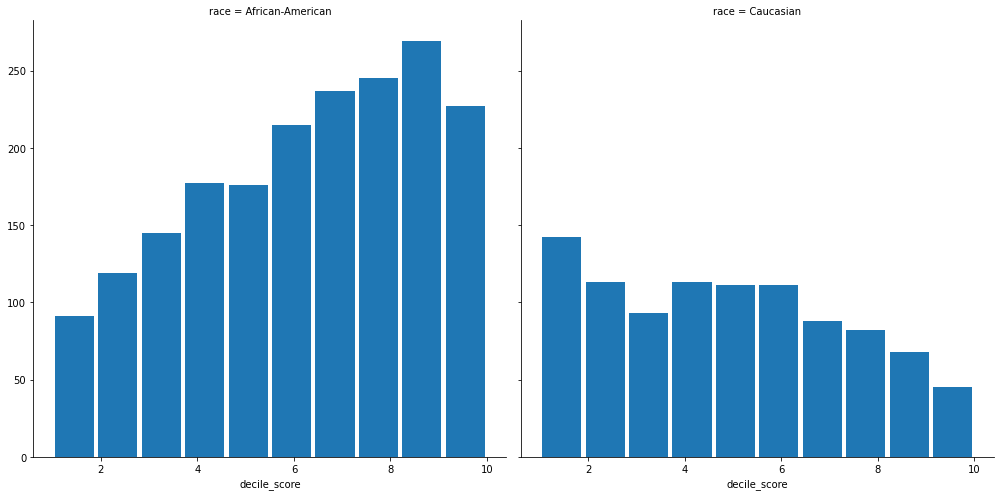

In [19]:
g = sns.FacetGrid(recid_df_race_focused, col='race', height=7)#, aspect=4,)
g.map(plt.hist, 'decile_score', rwidth=0.9)

In [20]:
recid_df = df.loc[df['two_year_recid']==1]

In [21]:
high_decile_recide = recid_df.loc[recid_df['decile_score'] > 4]

In [22]:
focused_high_decile = high_decile_recide[high_decile_recide['race'].isin(RACE_IN_FOCUS)]

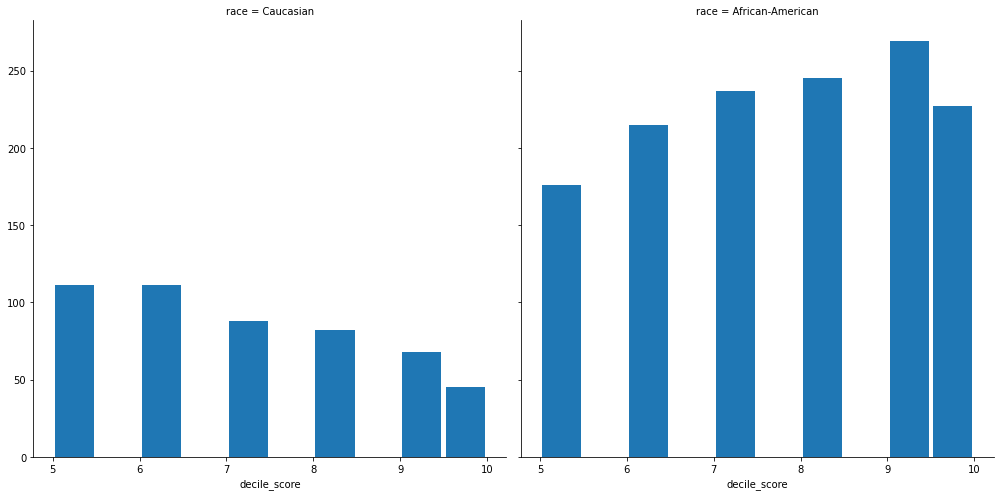

In [23]:
g = sns.FacetGrid(focused_high_decile, col='race', height=7)
g.map(plt.hist, 'decile_score', rwidth=0.9)

In [24]:
df = df.fillna(0)
df = df.replace({'race' : { 'African-American' : 0, 'Asian' : 1, 'Caucasian' : 3 ,'Hispanic':4,'Native American':5,'Other':6}})
df = df.replace({'sex' : { 'Male' : 1, 'Female' : 0}})

In [25]:
from scipy import stats
  
#df.two_year_recid

corr_df = pd.DataFrame(columns=['r','p'])
for col in df:
    if pd.api.types.is_numeric_dtype(df[col]):
        r,p = stats.pearsonr(df.two_year_recid,df[col])
        corr_df.loc[col] = [round(r,3),round(p,3)]
        
        
    

cor_value = abs(corr_df.r).sort_values(ascending=False)
cor_value.head(20)

/home/fade0329/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


two_year_recid             1.000
is_recid                   0.941
event                      0.786
end                        0.771
is_violent_recid           0.356
decile_score               0.351
decile_score.1             0.351
v_decile_score             0.296
priors_count               0.275
priors_count.1             0.275
age                        0.190
r_days_from_arrest         0.161
race                       0.127
juv_misd_count             0.109
juv_other_count            0.108
juv_fel_count              0.093
sex                        0.092
start                      0.080
c_days_from_compas         0.068
days_b_screening_arrest    0.025
Name: r, dtype: float64

In [26]:
df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,1,1947-04-18,69,Greater than 45,6,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,1,1982-01-22,34,25 - 45,0,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,1,1991-05-14,24,Less than 25,0,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,1,1993-01-21,23,Less than 25,0,...,6,Medium,2013-01-13,0,0,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,1,1973-01-22,43,25 - 45,6,...,1,Low,2013-03-26,0,0,2,0,1102,0,0
